# ข้อมูลสูญหาย (Missing Data/Values)
- ตรวจสอบข้อมูลเบื้องต้น
- จัดการกับข้อมูลสูญหาย

## ตรวจสอบข้อมูลเบื้องต้น
- ดูโครงสร้าง.. ใช้ List (head, tail, sample), ดูรายชื่อ Columns
- สถิติเบื้องต้น (describe): ค่าเฉลี่ย Max Min ..
- Data types: ชนิดข้อมูล float, object ...
- Data Visualization (Plot)
- Missing data (values)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load dataset
# df = pd.read_csv('/data/data_missing.csv', encoding='utf-8')
df = pd.read_csv('data/data_missing.csv')

### ดูโครงสร้าง
- List (head, tail, sample)
- ดูรายชื่อ Columns
- มิติ (shape)

In [4]:
# df
# df.head(7)   
df.head()              # NaN = Not a Number

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600


In [5]:
df.tail()

,Date,Zone,Temp,Humid,Rain
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [6]:
# df.sample(5)
df.sample(5, random_state=0)

,Date,Zone,Temp,Humid,Rain
2,3,E,NaN,30.2,NaN
8,9,Y,20.0,30.0,1800
4,5,N,18.0,25.7,1600
9,10,none,14.0,45.0,90.5
1,2,S,14.0,35.0,--


In [9]:
df.shape

(10, 5)

### List Columns

In [10]:
df.columns

Index(['Date', 'Zone', 'Temp', 'Humid', 'Rain'], dtype='object')

In [11]:
# df[['Temp', 'Humid', 'Rain']]
columns = ['Temp', 'Humid', 'Rain']
df[columns].head()

,Temp,Humid,Rain
0,12.0,45.0,1000
1,14.0,35.0,--
2,NaN,30.2,NaN
3,NaN,35.0,700.5
4,18.0,25.7,1600


### Data types

In [12]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain      object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10 non-null     int64  
 1   Zone    9 non-null      object 
 2   Temp    7 non-null      float64
 3   Humid   9 non-null      float64
 4   Rain    8 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 528.0+ bytes


### สถิติเบื้องต้น
ค่าเฉลี่ย Max Min ..

In [14]:
df.describe() #.round(3)

,Date,Temp,Humid
count,10.00000,7.000000,9.000000
mean,5.50000,16.142857,36.766667
std,3.02765,3.184785,7.343705
min,1.00000,12.000000,25.700000
25%,3.25000,14.000000,30.200000
50%,5.50000,15.000000,35.000000
75%,7.75000,19.000000,45.000000
max,10.00000,20.000000,45.000000


In [15]:
df.describe().round(2)

,Date,Temp,Humid
count,10.00,7.00,9.00
mean,5.50,16.14,36.77
std,3.03,3.18,7.34
min,1.00,12.00,25.70
25%,3.25,14.00,30.20
50%,5.50,15.00,35.00
75%,7.75,19.00,45.00
max,10.00,20.00,45.00


In [16]:
# pd.options.display.float_format = '{:,.3f}'.format
pd.reset_option('display.float_format')     # reset
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [17]:
df.describe()

,Date,Temp,Humid
count,10.00000,7.000000,9.000000
mean,5.50000,16.142857,36.766667
std,3.02765,3.184785,7.343705
min,1.00000,12.000000,25.700000
25%,3.25000,14.000000,30.200000
50%,5.50000,15.000000,35.000000
75%,7.75000,19.000000,45.000000
max,10.00000,20.000000,45.000000


In [18]:
df.style.format({'Temp': '{}', 'Humid':'{:.4f}'})

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0000,1000
1,2,S,14.0,35.0000,--
2,3,E,nan,30.2000,nan
3,4,W,nan,35.0000,700.5
4,5,N,18.0,25.7000,1600
5,6,N,20.0,nan,800.8
6,7,nan,15.0,45.0000,950
7,8,Y,nan,40.0000,nan
8,9,Y,20.0,30.0000,1800
9,10,none,14.0,45.0000,90.5


### Data Visualization (Plot)

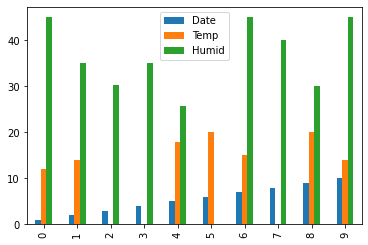

In [19]:
df.plot.bar()
plt.show()

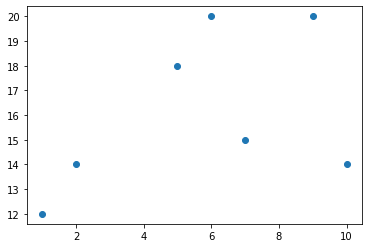

In [20]:
plt.scatter(df.Date, df.Temp)
plt.show()

### ตรวจสอบ Missing Values

In [21]:
# ตรวจสอบว่ามีข้อมูลสูญหายหรือไม่? Check Missing Data (Missing Values)
df.isnull().sum()

Date     0
Zone     1
Temp     3
Humid    1
Rain     2
dtype: int64

# ปัญหา Missing Values กับ Model

In [22]:
df = pd.read_csv('data/gdp4c.csv', index_col=0)
df.head()

,SGP,THA,USA,VNM
1960,704462302.4,2.760747e+09,5.433000e+11,NaN
1961,764308114.5,3.034044e+09,5.633000e+11,NaN
1962,825885273.7,3.308913e+09,6.051000e+11,NaN
1963,917222004.4,3.540403e+09,6.386000e+11,NaN
1964,893734483.2,3.889130e+09,6.858000e+11,NaN


In [23]:
df.tail()

,SGP,THA,USA,VNM
2013,3.044540e+11,4.203330e+11,1.669150e+13,1.712220e+11
2014,3.115390e+11,4.073390e+11,1.742760e+13,1.862050e+11
2015,3.040980e+11,4.013990e+11,1.812070e+13,1.932410e+11
2016,3.097640e+11,4.117550e+11,1.862450e+13,2.052760e+11
2017,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [24]:
df.describe()

,SGP,THA,USA,VNM
count,5.800000e+01,5.800000e+01,5.800000e+01,3.300000e+01
mean,8.043585e+10,1.227440e+11,6.991516e+12,6.878553e+10
std,1.007247e+11,1.353708e+11,5.857794e+12,6.664636e+10
min,7.044623e+08,2.760747e+09,5.433000e+11,6.293305e+09
25%,5.320927e+09,1.399794e+10,1.583852e+12,2.465747e+10
50%,2.788040e+10,6.695904e+10,5.455160e+12,3.506411e+10
75%,9.937334e+10,1.719910e+11,1.137740e+13,1.060150e+11
max,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


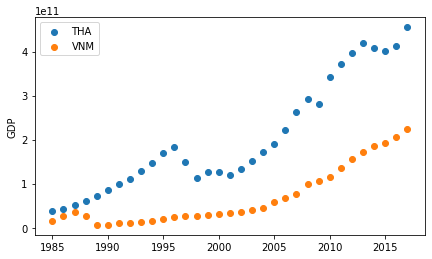

In [34]:
plt.figure(figsize=(7,4))
plt.scatter(df.index, df.THA, label='THA')
# plt.scatter(df.index, df.SGP, label='SGP')
plt.scatter(df.index, df.VNM, label='VNM')
plt.ylabel('GDP')
plt.legend()
plt.show()

### Model

In [35]:
from sklearn.linear_model import LinearRegression
x = df.index.values.reshape(-1, 1)
x[:5]

array([[1985],
       [1986],
       [1987],
       [1988],
       [1989]], dtype=int64)

In [36]:
y = df.VNM
y
# y[:5]

1985    1.409469e+10
1986    2.633662e+10
1987    3.665811e+10
1988    2.542381e+10
1989    6.293305e+09
1990    6.471741e+09
1991    9.613370e+09
1992    9.866990e+09
1993    1.318095e+10
1994    1.628643e+10
1995    2.073616e+10
1996    2.465747e+10
1997    2.684370e+10
1998    2.720960e+10
1999    2.868366e+10
2000    3.117252e+10
2001    3.268520e+10
2002    3.506411e+10
2003    3.955251e+10
2004    4.542785e+10
2005    5.763326e+10
2006    6.637166e+10
2007    7.741443e+10
2008    9.913030e+10
2009    1.060150e+11
2010    1.159320e+11
2011    1.355390e+11
2012    1.558200e+11
2013    1.712220e+11
2014    1.862050e+11
2015    1.932410e+11
2016    2.052760e+11
2017    2.238640e+11
Name: VNM, dtype: float64

In [37]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [38]:
df.shape

(33, 4)

In [39]:
df.dropna(inplace=True)         # ลบ NaN (Not a Number) Missing Values
df.head()

,SGP,THA,USA,VNM
1985,1.913830e+10,3.890069e+10,4.346730e+12,1.409469e+10
1986,1.856929e+10,4.309675e+10,4.590160e+12,2.633662e+10
1987,2.089763e+10,5.053544e+10,4.870220e+12,3.665811e+10
1988,2.533723e+10,6.166720e+10,5.252630e+12,2.542381e+10
1989,3.042357e+10,7.225088e+10,5.657690e+12,6.293305e+09


In [40]:
df.shape

(33, 4)

In [41]:
df.head()

,SGP,THA,USA,VNM
1985,1.913830e+10,3.890069e+10,4.346730e+12,1.409469e+10
1986,1.856929e+10,4.309675e+10,4.590160e+12,2.633662e+10
1987,2.089763e+10,5.053544e+10,4.870220e+12,3.665811e+10
1988,2.533723e+10,6.166720e+10,5.252630e+12,2.542381e+10
1989,3.042357e+10,7.225088e+10,5.657690e+12,6.293305e+09


# Workshop: Missing Values

In [42]:
df = pd.read_csv('data/data_missing.csv')
# df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
# df.head()
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


## ตรวจสอบเบื้องต้น

In [43]:
df.shape

(10, 5)

In [44]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain      object
dtype: object

In [45]:
df.describe()

,Date,Temp,Humid
count,10.00000,7.000000,9.000000
mean,5.50000,16.142857,36.766667
std,3.02765,3.184785,7.343705
min,1.00000,12.000000,25.700000
25%,3.25000,14.000000,30.200000
50%,5.50000,15.000000,35.000000
75%,7.75000,19.000000,45.000000
max,10.00000,20.000000,45.000000


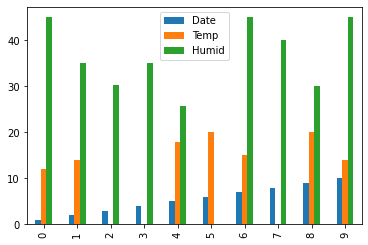

In [46]:
import matplotlib.pyplot as plt
df.plot.bar()
# df.Temp.plot.bar()
plt.show()

In [47]:
df.Date = df.Date.astype('category')

In [48]:
df.dtypes

Date     category
Zone       object
Temp      float64
Humid     float64
Rain       object
dtype: object

In [49]:
df.describe()

,Temp,Humid
count,7.000000,9.000000
mean,16.142857,36.766667
std,3.184785,7.343705
min,12.000000,25.700000
25%,14.000000,30.200000
50%,15.000000,35.000000
75%,19.000000,45.000000
max,20.000000,45.000000


## Missing Values

In [50]:
df.isnull().sum()

Date     0
Zone     1
Temp     3
Humid    1
Rain     2
dtype: int64

In [51]:
df.isnull()

,Date,Zone,Temp,Humid,Rain
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,True
3,False,False,True,False,False
4,False,False,False,False,False
5,False,False,False,True,False
6,False,True,False,False,False
7,False,False,True,False,True
8,False,False,False,False,False
9,False,False,False,False,False


In [52]:
df.isnull().any()

Date     False
Zone      True
Temp      True
Humid     True
Rain      True
dtype: bool

In [53]:
df.isnull().sum()

Date     0
Zone     1
Temp     3
Humid    1
Rain     2
dtype: int64

In [54]:
df.notnull()

,Date,Zone,Temp,Humid,Rain
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,False,True,False
3,True,True,False,True,True
4,True,True,True,True,True
5,True,True,True,False,True
6,True,False,True,True,True
7,True,True,False,True,False
8,True,True,True,True,True
9,True,True,True,True,True


In [55]:
df.notnull().sum()

Date     10
Zone      9
Temp      7
Humid     9
Rain      8
dtype: int64

## ตรวจสอบเปอร์เซนต์ของ Missing Values

In [56]:
missing_count = df.isnull().sum()

total_cells = np.product(df.shape)
total_missing = missing_count.sum()

# percent of data that is missing
missing_percent = total_missing *100 /total_cells

print('Total cells: {}' . format(total_cells))
print('Total missing values: {}' . format(total_missing))
print('missing: {} %' . format(missing_percent))

Total cells: 50
Total missing values: 7
missing: 14.0 %


## ตรวจสอบ Column

In [57]:
df.columns

Index(['Date', 'Zone', 'Temp', 'Humid', 'Rain'], dtype='object')

In [58]:
df.Temp.isnull().sum()

3

In [59]:
df.Temp.isnull()

0    False
1    False
2     True
3     True
4    False
5    False
6    False
7     True
8    False
9    False
Name: Temp, dtype: bool

In [60]:
# List แถว (rows) ที่มี Missing Values
df[df.Temp.isnull()]

,Date,Zone,Temp,Humid,Rain
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
7,8,Y,NaN,40.0,NaN


In [61]:
df[df.Rain.isnull()]

,Date,Zone,Temp,Humid,Rain
2,3,E,NaN,30.2,NaN
7,8,Y,NaN,40.0,NaN


In [62]:
df[df.Humid.isnull()]

,Date,Zone,Temp,Humid,Rain
5,6,N,20.0,NaN,800.8


In [63]:
# List ทุกคอลัมน์ ที่มี Missing Values
df[df.isnull().any(axis=1)]

,Date,Zone,Temp,Humid,Rain
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN


# จัดการกับ Missing Values
- เติมข้อมูลเข้าไปแทนที่
- ลบทิ้ง (Drop)

## การเติมข้อมูลเข้าไปแทนที่ Missing Values
- ค่ากลาง (ค่าเฉลี่ย, median ...)
- ค่าใด ๆ
- ข้อมูลก่อนหน้า หรือ ข้อมูลลำดับถัดไป

### แทนที่ด้วยค่ากลาง หรือค่าใดค่าหนึ่ง

In [64]:
df.describe()

,Temp,Humid
count,7.000000,9.000000
mean,16.142857,36.766667
std,3.184785,7.343705
min,12.000000,25.700000
25%,14.000000,30.200000
50%,15.000000,35.000000
75%,19.000000,45.000000
max,20.000000,45.000000


In [65]:
colm = 'Humid'
df[colm] = df[colm].fillna(df[colm].mean())

In [66]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.000000,1000
1,2,S,14.0,35.000000,--
2,3,E,NaN,30.200000,NaN
3,4,W,NaN,35.000000,700.5
4,5,N,18.0,25.700000,1600
5,6,N,20.0,36.766667,800.8
6,7,NaN,15.0,45.000000,950
7,8,Y,NaN,40.000000,NaN
8,9,Y,20.0,30.000000,1800
9,10,none,14.0,45.000000,90.5


In [67]:
colm = 'Humid'
df[colm] = df[colm].fillna(df[colm].median())

In [68]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.000000,1000
1,2,S,14.0,35.000000,--
2,3,E,NaN,30.200000,NaN
3,4,W,NaN,35.000000,700.5
4,5,N,18.0,25.700000,1600
5,6,N,20.0,36.766667,800.8
6,7,NaN,15.0,45.000000,950
7,8,Y,NaN,40.000000,NaN
8,9,Y,20.0,30.000000,1800
9,10,none,14.0,45.000000,90.5


In [69]:
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')  # Reload the original dataset
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [70]:
# เติม/แทนที่ NaN ด้วยค่าใดค่าหนึ่ง
colm = ['Humid','Temp']
df[colm] = df[colm].fillna(99)

In [71]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,99.0,30.2,NaN
3,4,W,99.0,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,99.0,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,99.0,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


### เปลี่ยนชนิดข้อมูลเป็นตัวเลข (คอลัมน์->numeric)

In [72]:
df = pd.read_csv('data/data_missing.csv')  # Reload the original dataset
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [73]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain      object
dtype: object

In [83]:
colm = 'Rain'
df[colm] = df[colm].fillna(df[colm].mean())     # Error

In [76]:
df.Rain = pd.to_numeric(df.Rain,errors='coerce')    #errors='coerce', 

In [78]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain     float64
dtype: object

In [84]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000.000000
1,2,S,14.0,35.0,991.685714
2,3,E,NaN,30.2,991.685714
3,4,W,NaN,35.0,700.500000
4,5,N,18.0,25.7,1600.000000
5,6,N,20.0,NaN,800.800000
6,7,NaN,15.0,45.0,950.000000
7,8,Y,NaN,40.0,991.685714
8,9,Y,20.0,30.0,1800.000000
9,10,none,14.0,45.0,90.500000


In [80]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain     float64
dtype: object

In [81]:
colm = 'Rain'
df[colm] = df[colm].fillna(df[colm].mean())  

### การแทนค่าด้วยข้อมูลก่อนหน้า หรือข้อมูลถัดไป

In [85]:
df = pd.read_csv('data/data_missing.csv')  # Reload the original dataset
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [86]:
# แทนที่ด้วยข้อมูลก่อนหน้า
# นำข้อมูลก่อนหน้า เติมให้ Missing values (NaN) ลำดับถัดไป
df.fillna(method='pad', inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,14.0,30.2,--
3,4,W,14.0,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,25.7,800.8
6,7,N,15.0,45.0,950
7,8,Y,15.0,40.0,950
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [87]:
df = pd.read_csv('data/data_missing.csv')  # Reload the original dataset
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [88]:
df.fillna(method='pad', limit=1, inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,14.0,30.2,--
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,25.7,800.8
6,7,N,15.0,45.0,950
7,8,Y,15.0,40.0,950
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [89]:
df = pd.read_csv('data/data_missing.csv')  # Reload the original dataset
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [90]:
# แทนที่ด้วยข้อมูลถัดไป
# นำข้อมูลข้างหลัง มาเติมให้ Missing values (NaN) ลำดับก่อนหน้า (เอาข้างหลัง มาเติมให้ข้างหน้า)
df.fillna(method='bfill', inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,18.0,30.2,700.5
3,4,W,18.0,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,45.0,800.8
6,7,Y,15.0,45.0,950
7,8,Y,20.0,40.0,1800
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


### กำหนดค่า Missing Data ตอน Load file
เช่น ถ้าข้อมูลเป็น 'n/a' , 'na' , '--' , 'none' ให้ถือว่าเป็น Missing Values ให้ใส่ NaN ลงไปเลย

In [91]:
missing_vals = ['n/a','na','--','none']
df = pd.read_csv('data/data_missing.csv', na_values=missing_vals)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000.0
1,2,S,14.0,35.0,NaN
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600.0
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950.0
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800.0
9,10,NaN,14.0,45.0,90.5


## ลบข้อมูล (Drop)

In [92]:
df = pd.read_csv('data/data_missing.csv')  # Reload the original dataset
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


### ลบทั้งแถว (Drop Row)

In [93]:
# ลบออกทั้งแถว (Drop) ที่มี NaN
df.dropna(inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
4,5,N,18.0,25.7,1600
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


### ลบ (Drop) บางส่วน

In [94]:
df = pd.read_csv('data/data_missing.csv')  # Reload the original dataset
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [95]:
df.dropna(subset=['Temp', 'Humid'], inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
4,5,N,18.0,25.7,1600
6,7,NaN,15.0,45.0,950
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


### ลบ Column

In [96]:
df = pd.read_csv('data/data_missing.csv')  # Reload the original dataset
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [97]:
df.dropna(axis='columns', inplace=True)
df

,Date
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


### ลบแบบมีเงื่อนไข (Threshold)

In [98]:
df = pd.read_csv('data/data_missing.csv')  # Reload the original dataset
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [99]:
df.dropna(thresh=8, axis=1, inplace=True)
df

,Date,Zone,Humid,Rain
0,1,N,45.0,1000
1,2,S,35.0,--
2,3,E,30.2,NaN
3,4,W,35.0,700.5
4,5,N,25.7,1600
5,6,N,NaN,800.8
6,7,NaN,45.0,950
7,8,Y,40.0,NaN
8,9,Y,30.0,1800
9,10,none,45.0,90.5


In [100]:
df.shape

(10, 4)

In [101]:
df.shape[0]

10

In [102]:
left = int(df.shape[0] * .8)
left

8

In [103]:
df.dropna(thresh=left, axis=1) # inplacce=True

,Date,Zone,Humid,Rain
0,1,N,45.0,1000
1,2,S,35.0,--
2,3,E,30.2,NaN
3,4,W,35.0,700.5
4,5,N,25.7,1600
5,6,N,NaN,800.8
6,7,NaN,45.0,950
7,8,Y,40.0,NaN
8,9,Y,30.0,1800
9,10,none,45.0,90.5


In [104]:
df.loc[[0,4],:] = np.nan
df

,Date,Zone,Humid,Rain
0,NaN,NaN,NaN,NaN
1,2.0,S,35.0,--
2,3.0,E,30.2,NaN
3,4.0,W,35.0,700.5
4,NaN,NaN,NaN,NaN
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN
8,9.0,Y,30.0,1800
9,10.0,none,45.0,90.5


In [105]:
df[df.isnull().any(axis=1)]

,Date,Zone,Humid,Rain
0,NaN,NaN,NaN,NaN
2,3.0,E,30.2,NaN
4,NaN,NaN,NaN,NaN
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN


In [106]:
df[df.isnull().all(axis=1)]

,Date,Zone,Humid,Rain
0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [107]:
df.dropna(how='all', inplace=True)
df

,Date,Zone,Humid,Rain
1,2.0,S,35.0,--
2,3.0,E,30.2,NaN
3,4.0,W,35.0,700.5
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN
8,9.0,Y,30.0,1800
9,10.0,none,45.0,90.5


In [108]:
df['location'] = np.nan
df

,Date,Zone,Humid,Rain,location
1,2.0,S,35.0,--,NaN
2,3.0,E,30.2,NaN,NaN
3,4.0,W,35.0,700.5,NaN
5,6.0,N,NaN,800.8,NaN
6,7.0,NaN,45.0,950,NaN
7,8.0,Y,40.0,NaN,NaN
8,9.0,Y,30.0,1800,NaN
9,10.0,none,45.0,90.5,NaN


In [109]:
# drop column if all are NaN
df.dropna(axis=1, how='all', inplace=True)
df

,Date,Zone,Humid,Rain
1,2.0,S,35.0,--
2,3.0,E,30.2,NaN
3,4.0,W,35.0,700.5
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN
8,9.0,Y,30.0,1800
9,10.0,none,45.0,90.5


# ตรวจสอบข้อมูล
- Unique (ตัวแปรชนิด Category)
- ข้อมูลซ้ำ

In [ ]:
df = pd.read_csv('data/data_clean_bfclean.csv')  
df

### Unique

In [ ]:
# Unique (Group)
cols_to_check = ['OWN_OCCUPIED','NUM_BATH']
for i, col in enumerate(cols_to_check):
    print(df.groupby(col)[cols_to_check[i]].count())
    print('--------------')

### ตรวจข้อมูลซ้ำ

In [ ]:
df = pd.read_csv('data/data_clean6_after_clean_bedroom_dup.csv')  
df

In [ ]:
df[df.duplicated()]

In [ ]:
# ลบ Row ที่ซ้ำ
df.drop_duplicates(inplace=True)
df

In [ ]:
#openrefine โปรแกรมเตรียมข้อมูล